In [119]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt  
import seaborn as sns

In [106]:
train_data = pd.read_csv('./train_set.csv')
test_data = pd.read_csv('./test_set.csv')

In [107]:
X_test = test_data.iloc[:,0:-1]
y_test = test_data.iloc[:,-1]
X_train = train_data.iloc[:,0:-1]
y_train = train_data.iloc[:,-1]

In [108]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from sklearn import linear_model

In [109]:
logistic_regressor = LogisticRegression()
pipeline = Pipeline(steps=[('add_poly_features', PolynomialFeatures()),
                           ('logistic_regression', logistic_regressor)])

In [110]:
logistic_regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
X_train.shape

(24000, 26)

In [112]:
y_train.shape

(24000L,)

In [113]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [114]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_pre_proba = pipeline.predict_proba(X_test)

#print y_pre_proba.shape

print 'Accurancy- {}'.format(accuracy_score(y_test, y_pred))
print 'Precision- {}'.format(precision_score(y_test,y_pred))
print 'ROCAUC- {}'.format(roc_auc_score(y_test,y_pred))

#predicting probablity only for single column (yes), ROC only gets value for single class
fpr, tpr, thresholds = roc_curve(y_test, y_pre_proba[:,1])
print 'fpr- {}'.format(fpr)
print 'tpr- {}'.format(tpr)
print 'thresholds- {}'.format(thresholds)

Accurancy- 0.776666666667
Precision- 0.348837209302
ROCAUC- 0.50265591218
fpr- [  0.00000000e+00   2.13995292e-04   4.27990584e-04 ...,   9.98930024e-01
   9.98930024e-01   1.00000000e+00]
tpr- [ 0.          0.          0.         ...,  0.99924642  1.          1.        ]
thresholds- [  1.98924443e+00   9.89244432e-01   9.75395990e-01 ...,   2.60068302e-09
   1.28922767e-09   1.31657217e-30]


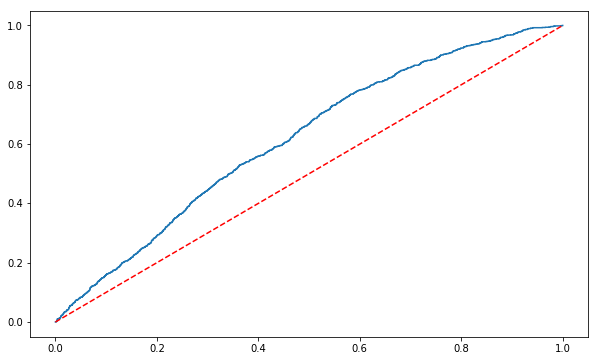

In [115]:
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.show()

In [116]:
# Fitting bagging classifier with Logisitc Regression
from sklearn.ensemble import BaggingClassifier

bagging_clf1 = BaggingClassifier(LogisticRegression(), n_estimators=100, max_samples=100, 
                                bootstrap=True, random_state=9)

bagging_clf1.fit(X_train, y_train)
y_pred_bagging = bagging_clf1.predict(X_test)
score_bc_lr = accuracy_score(y_test, y_pred_bagging)

In [117]:
print "bagging classifier (logistic regression) accuracy %.4f" %(score_bc_lr)

bagging classifier (logistic regression) accuracy 0.7795


In [118]:
# regularized logistic regression
lg_reg_clf = linear_model.SGDClassifier(loss='log',penalty='elasticnet')
lg_reg_clf.fit(X_train, y_train)


C:\Users\YURAJ\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [121]:
y_pred_lg_reg = lg_reg_clf.predict(X_test)
y_pred_prob_lg_reg = lg_reg_clf.predict_proba(X_test)

#print y_pre_proba.shape

print 'Accurancy- {}'.format(accuracy_score(y_test, y_pred_lg_reg))
print 'Precision- {}'.format(precision_score(y_test,y_pred_lg_reg))
print 'ROCAUC- {}'.format(roc_auc_score(y_test,y_pred_lg_reg))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lg_reg[:,1])
print 'fpr- {}'.format(fpr)
print 'tpr- {}'.format(tpr)
print 'thresholds- {}'.format(thresholds)

Accurancy- 0.222333333333
Precision- 0.221238938053
ROCAUC- 0.500209399312
fpr- [ 0.          0.99807404  1.        ]
tpr- [ 0.          0.99849284  1.        ]
thresholds- [ 2.  1.  0.]
